In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']

scalar_info   = {'tmax' : 10, 
                 'dt' : 0.01, 
                 'Re' : 100.0}

simulation_info = {'time_stepping' : 'euler', 
                   'poisson_solver' : 'serial_direct', 
                   'with_ib' : False}

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_pres, bc_val_center=bc_val_pres,
                                              bc_type_facex=bc_type_u, bc_val_facex=bc_val_u,
                                              bc_type_facey=bc_type_v, bc_val_facey=bc_val_v)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(imbound_info=simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
while scalars.variable['time'] <= scalars.variable['tmax']:
    
    ins.advance()
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.325356703085403e-12
Max, Min, U   : 2.0, -0.06368604136069304
Max, Min, V   : 0.1597809848293595, -0.1597809848293595
Max, Min, P   : 1.809644336873601, -1.8330976847747142
Max, Min, DIV : 1.1102230246251565e-14, -1.6167622796103842e-14


------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.147292970872391e-12
Max, Min, U   : 2.0, -0.1353463117209021
Max, Min, V   : 0.3062757789458833, -0.314163792182704
Max, Min, P   : 1.1720469542368113, -0.8768167067700965
Max, Min, DIV : 7.549516567451064e-15, -6.106226635438361e-15


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3492885816880388e-12
Max, Min, U   : 2.0, -0.15408001946195576
Max, Min, V   : 0.32005119576803975, -0.37180322303316493
Max, Min, P   : 1.1745623613484937, -0.793012970538313

------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.274714728127343e-12
Max, Min, U   : 2.0, -0.23296909625575596
Max, Min, V   : 0.34597736966117276, -0.5075870955487242
Max, Min, P   : 1.2897884406057223, -0.6941049752286246
Max, Min, DIV : 8.881784197001252e-15, -5.773159728050814e-15


------------ Time = 2.5999999999999885 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0074540341267468e-12
Max, Min, U   : 2.0, -0.23342406901473547
Max, Min, V   : 0.34601324657082716, -0.5084967992654854
Max, Min, P   : 1.2898743871754081, -0.6949267870046842
Max, Min, DIV : 1.021405182655144e-14, -5.329070518200751e-15


------------ Time = 2.6999999999999864 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.819328921549352e-12
Max, Min, U   : 2.0, -0.23370685341556482
Max, Min, V   : 0.34604553764814494, -0.5093159557369091
Max, Min, P   : 1.2927758506506168, -0.

------------ Time = 4.999999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.193414119558916e-12
Max, Min, U   : 2.0, -0.23788259834681313
Max, Min, V   : 0.3463529714344424, -0.5171259190447465
Max, Min, P   : 1.3109000270906612, -0.6848058011920366
Max, Min, DIV : 9.992007221626409e-15, -7.993605777301127e-15


------------ Time = 5.099999999999936 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.368774099190774e-12
Max, Min, U   : 2.0, -0.23791525908274325
Max, Min, V   : 0.34635797632270227, -0.5172542844398058
Max, Min, P   : 1.3076272534968292, -0.6882807887448669
Max, Min, DIV : 7.771561172376096e-15, -4.440892098500626e-15


------------ Time = 5.199999999999934 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3420713630784314e-12
Max, Min, U   : 2.0, -0.2379411193652077
Max, Min, V   : 0.3463626752839036, -0.5173749211597852
Max, Min, P   : 1.3071481626757402, -0.688951

------------ Time = 7.399999999999887 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.006425782710956e-12
Max, Min, U   : 2.0, -0.23933846968218636
Max, Min, V   : 0.346418316911722, -0.518814718432044
Max, Min, P   : 1.308484671451096, -0.6899902505907352
Max, Min, DIV : 9.547918011776346e-15, -5.551115123125783e-15


------------ Time = 7.4999999999998845 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1361189756918394e-12
Max, Min, U   : 2.0, -0.2393670996113907
Max, Min, V   : 0.34641953447820667, -0.5188465169445742
Max, Min, P   : 1.310740079389038, -0.6877891725605372
Max, Min, DIV : 6.217248937900877e-15, -6.439293542825908e-15


------------ Time = 7.599999999999882 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2109367840877548e-12
Max, Min, U   : 2.0, -0.23939392314031974
Max, Min, V   : 0.3464206855223626, -0.5188765923090273
Max, Min, P   : 1.309163218701401, -0.689417486

------------ Time = 9.799999999999836 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3283486540753786e-12
Max, Min, U   : 2.0, -0.2397065031947304
Max, Min, V   : 0.3464349014912418, -0.5192492651498604
Max, Min, P   : 1.3072675684259785, -0.6919556822187223
Max, Min, DIV : 7.993605777301127e-15, -8.215650382226158e-15


------------ Time = 9.899999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.046648065298546e-12
Max, Min, U   : 2.0, -0.2397132266547573
Max, Min, V   : 0.34643522466130006, -0.5192577656767638
Max, Min, P   : 1.31147091079499, -0.6877670904861066
Max, Min, DIV : 5.329070518200751e-15, -5.329070518200751e-15


------------ Time = 9.999999999999831 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1638355660339095e-12
Max, Min, U   : 2.0, -0.23971957797525761
Max, Min, V   : 0.34643553064615806, -0.5192658154435615
Max, Min, P   : 1.30916084060947, -0.690091132

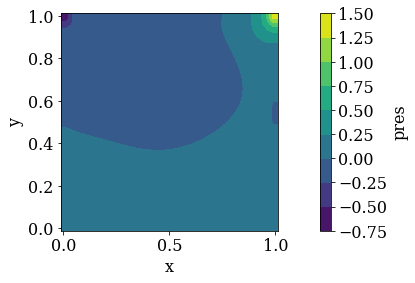

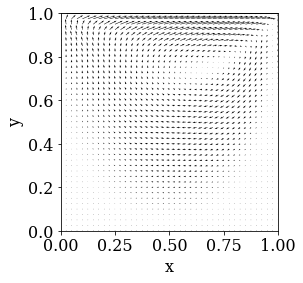

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx,gridy,'velc')